# INDEX
- 1) Test methods individually by hand to see errors in them - **OKAY**
- 2) Apply cross validtion to see if results are consistent with only one run of the method (done in 1)) - **OKAY**
- 3) Find good hyperparameters for each method "automatically" using cross validation - **OKAY**
- 4) Feature modification and compare results with previous runs
- 5) Add new feature modification (logs and 3 groups of -999s maybe)


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from functions import *
dirname = os.path.dirname('__file__')
DATA_TRAIN_PATH = os.path.join(dirname, 'data/train.csv')
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

# 1) Tested methods with different parameters by hand and in cross validation. I want good accuracy mainly
- **least_squares_GD:** the more iters the greater the rmse error, gamma should be around 1e-6, initial weights better if ones than zeros. F1 ~ 0.41 and A ~ 0.63 . Cross validation is consistent. rmse is in the order of 5e63. With large gammas (1e-5 and 20 maxiters) it breaks. Later i got better results with zeros. Mystery.

- **least_squares_SGD:** for big gammas (0.1) and many iters (80) the SGD gives an invalid value for matmul, i dunno why. Accuracy, F1 and rmse change a lot depending on the run without changing the parameters, between 0.36 an 0.65 the accuracy is jumping, so doesnt look very reliable, you can really see it in the cross validation accuracy prints. rmse is in the order of 5e56

- **least_squares:** very nice. Gives F1 ~ 0.57 and accuracy ~ 0.74 always, as can be seen in the cross validation prints. rmse is 0.82.

- **ridge_regression:** when the penalization is small you get higher values for F1 and accuracy~0.74 (lambda=0.01) but when they are bigger (lambda=1000), the results get a liiittle bit worse: accuracy around 0.69 and F1 also falls from 0.53 to 0.31. In this method rmse is very small, around 0.85. Same for cross validation.

- **logistic_regression_gd:** gamma desnt do anthing interesting, neither does iters or the initial weights. F1~ 0.36 and acc~0.66. the rmse_lr is 4e4 *negative* btw. Sometimes there is a warning that "there is an overflow in the sigmoid function" but then you run it again and disappears. Cross validation has the same results approx. 

- **logistic_regression_reg:** the gamma doesnt do much, but lamda decreases the accuracy from 0.66 to 0.31 when going from lambda=0.1 to 100. initial weights dont do anything, or maxiters. F1 gets higher with higher lambdas, from 0.36 to 0.4. The rmse is positive 1e17. Cross-v says the same.


In [3]:
w, loss = least_squares_GD(y, tx, np.zeros(tx.shape[1]), 20, 0.0000001)
y_pred = predict_labels(w, tx)
f1_value = f1(y, y_pred)
acc_value = accuracy(y, y_pred)

20
Gradient Descent: RMSE is  0.9257609262143314
TP =  31895 ; FP =  36047 ; TN =  128286 ; FN =  53772
F1 = 0.4152751466385433
Accuracy = 0.640724


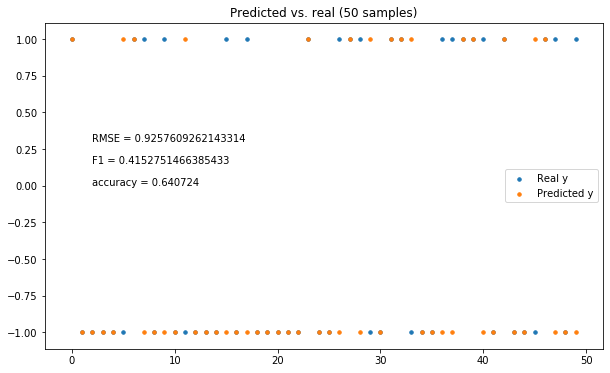

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
first_obser = range(50)

ax.scatter(first_obser,y[0:50],s=12, label='Real y')
ax.scatter(first_obser,y_pred[0:50],s=12, label='Predicted y')
ax.title.set_text('Predicted vs. real (50 samples)')
ax.text(2,0.3,'RMSE = '+str(loss))
ax.text(2,0.15, 'F1 = '+ str(f1_value))
ax.text(2,0,'accuracy = '+str(acc_value))
leg = ax.legend();
plt.show()

# 2) Cross validation returns 
- weights
- rmse train
- rmse test
- F1
- Accuracy

In [4]:
degree = 6
call_cross_validation(y, tx, k=3, degree=degree, seed=2, opt_method=least_squares, initial_w=np.ones(tx.shape[1]  * degree + 1), max_iters=20, gamma=0.0000001, lambda_=10)

least_squares
Least squares: RMSE is  0.7655073757013974
TP =  18424 ; FP =  6852 ; TN =  48062 ; FN =  9995
F1 = 0.6862463916565789
Accuracy = 0.7978351913407654
least_squares
Least squares: RMSE is  0.7642864240330584
TP =  18360 ; FP =  6566 ; TN =  48251 ; FN =  10156
F1 = 0.6871000336813742
Accuracy = 0.7993351973407894
least_squares
Least squares: RMSE is  0.7646716888608729
TP =  18415 ; FP =  6647 ; TN =  48165 ; FN =  10106
F1 = 0.6873448668420954
Accuracy = 0.7989631958527834


(array([-5.09903122e+04,  3.14822182e-02,  5.99656812e-03,  9.49381301e-03,
        -3.42777237e-03, -8.06969926e-02, -3.40847847e-03, -4.82167278e-02,
        -2.34758208e+00, -8.82215538e-04, -2.69326490e+00, -2.34386645e-01,
        -1.48319768e-01,  3.27115607e-01,  2.74006965e+00, -4.11912114e-03,
         1.56783082e-03,  2.71232346e+00,  8.70715713e-04,  9.45453546e-03,
        -7.80047847e-03,  6.01144407e-04,  2.84950190e-03,  2.96185817e+04,
         1.66908517e-02,  3.49979377e-04, -9.19024263e-06,  1.06061340e-02,
        -1.88571604e-02,  3.48732078e-03,  2.69079039e+00, -1.55788529e-04,
        -3.81679802e-04, -1.65556502e-04,  3.69021938e-05,  1.54566444e-02,
         7.31238636e-06, -1.38473497e-03,  2.52626724e+00, -2.57456556e-05,
         3.20954932e-05,  1.72833167e-01,  2.59759665e-02,  1.70810094e-03,
        -6.33476286e-04,  1.97361466e-03,  2.13640150e-03, -4.86699003e-04,
        -3.72715440e-02, -2.20350044e-03,  2.21968192e-04, -2.16189773e-04,
        -1.1

# 3) Find good hyperparameters automatically, i didnt do initial weights 

# gradient descent: max_iters, gamma, degrees, initial_w

In [19]:
lambdas = [0]
gammas = [1e-11, 1e-9,1e-7,1e-6]
degrees = [0, 1, 2, 3, 4, 5]
max_iterations =  [5,10,20,50]
factors = [0, 0.5, 1]
pd_filled_GD = hyperparameter_tuning(y,tx,4,2,least_squares_GD,max_iterations,degrees,gammas,lambdas,factors);

least_squares_GD
5
Gradient Descent: RMSE is  0.9999999999950961
TP =  0 ; FP =  0 ; TN =  41223 ; FN =  21277
F1 = 0
Accuracy = 0.659568
least_squares_GD
5
Gradient Descent: RMSE is  0.9999999999901044
TP =  0 ; FP =  0 ; TN =  41048 ; FN =  21452
F1 = 0
Accuracy = 0.656768
least_squares_GD
5
Gradient Descent: RMSE is  0.9999999999851229
TP =  0 ; FP =  0 ; TN =  41020 ; FN =  21480
F1 = 0
Accuracy = 0.65632
least_squares_GD
5
Gradient Descent: RMSE is  0.9999999999802744
TP =  0 ; FP =  0 ; TN =  41167 ; FN =  21333
F1 = 0
Accuracy = 0.658672
least_squares_GD
5
Gradient Descent: RMSE is  1.2505934590960182
TP =  21353 ; FP =  41147 ; TN =  0 ; FN =  0
F1 = 0.509296029957187
Accuracy = 0.341648
least_squares_GD
5
Gradient Descent: RMSE is  1.250827992385048
TP =  21408 ; FP =  41092 ; TN =  0 ; FN =  0
F1 = 0.5102731563140582
Accuracy = 0.342528
least_squares_GD
5
Gradient Descent: RMSE is  1.250188252411683
TP =  21258 ; FP =  41242 ; TN =  0 ; FN =  0
F1 = 0.5076052436782158
Accurac

In [20]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['acc'].idxmax()])

,165
acc,0.670516
degree,1
f1,0.385486
factors,0
gamma,1e-07
lambda,0
max_iters,50
out_w,"[-7.213379397241709e-07, 0.0004589612760141647..."
rmse_te,0.911143
rmse_tr,0.911075


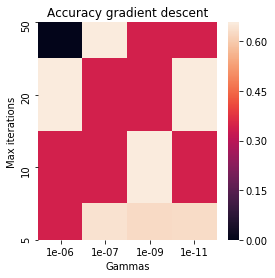

In [43]:
accuracies = list(pd_filled_GD['acc'].values) 
paint=np.zeros((len(max_iterations),len(gammas)))
k = -1
for i in range(len(max_iterations)):
    for j in range(len(gammas)):
        paint[i][j]=accuracies[k]
        k+=1
plt.figure(figsize=(4,4))
sns.heatmap(paint,xticklabels=gammas[::-1], yticklabels=max_iterations[::-1])
plt.xlabel('Gammas')
plt.ylabel('Max iterations')
plt.title('Accuracy gradient descent')
plt.show()

In [44]:
#find parameters that maximize F1
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['f1'].idxmax()])

,160
acc,0.513326
degree,1
f1,0.526829
gamma,1e-07
lambda,0
max_iters,10
out_w,"[0.49993713739089635, 0.23379995283229407, 0.5..."
rmse_te,353.32
rmse_tr,353.627


In [45]:
#find parameters that minimize rmse_train
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['rmse_tr'].idxmin()])

,165
acc,0.663375
degree,1
f1,0.394244
gamma,1e-07
lambda,0
max_iters,50
out_w,"[-5.582008794339909e-07, 0.0004361842188080634..."
rmse_te,0.913236
rmse_tr,0.912292


In [46]:
#find parameters that minimize rmse_test
pd.DataFrame(pd_filled_GD.loc[pd_filled_GD['rmse_te'].idxmin()])

,165
acc,0.663375
degree,1
f1,0.394244
gamma,1e-07
lambda,0
max_iters,50
out_w,"[-5.582008794339909e-07, 0.0004361842188080634..."
rmse_te,0.913236
rmse_tr,0.912292


# stochastic gradient descent: max_iters, gamma, degrees, intial_w


In [16]:
lambdas = [0]
gammas = [1e-11, 1e-10, 1e-9]
degrees = [1,2,3,4,5]
max_iterations =  [10,20,50]
factors = [0, 0.5, 1]
pd_filled_SGD = hyperparameter_tuning(y,tx,3,2,least_squares_SGD,max_iterations,degrees,gammas,lambdas,factors)

least_squares_SGD
Stochastic Gradient Descent: RMSE is  0.9999940106322378
TP =  10869 ; FP =  13336 ; TN =  41469 ; FN =  17659
F1 = 0.41222763734284035
Accuracy = 0.628058512234049
least_squares_SGD
Stochastic Gradient Descent: RMSE is  0.9995007849667779
TP =  10855 ; FP =  12923 ; TN =  41732 ; FN =  17823
F1 = 0.41387067256367244
Accuracy = 0.6310465241860967
least_squares_SGD
Stochastic Gradient Descent: RMSE is  0.9999506075727835
TP =  10847 ; FP =  13225 ; TN =  41455 ; FN =  17806
F1 = 0.41145566619250834
Accuracy = 0.627626510506042
least_squares_SGD
Stochastic Gradient Descent: RMSE is  4655.185832911767
TP =  10900 ; FP =  13270 ; TN =  41501 ; FN =  17662
F1 = 0.41341121140863235
Accuracy = 0.628814515258061
least_squares_SGD
Stochastic Gradient Descent: RMSE is  4610.0918046277675
TP =  10959 ; FP =  13226 ; TN =  41576 ; FN =  17572
F1 = 0.4157750967448213
Accuracy = 0.6304225216900867
least_squares_SGD
Stochastic Gradient Descent: RMSE is  2978.31358929484
TP =  10729 

C:\Users\Public\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


least_squares_SGD
Stochastic Gradient Descent: RMSE is  inf
TP =  17861 ; FP =  41673 ; TN =  13154 ; FN =  10645
F1 = 0.4057473875511131
Accuracy = 0.3721814887259549
least_squares_SGD
Stochastic Gradient Descent: RMSE is  1.0219800817360023e+88
TP =  10459 ; FP =  12785 ; TN =  42112 ; FN =  17977
F1 = 0.40476006191950464
Accuracy = 0.6308545234180937
least_squares_SGD
Stochastic Gradient Descent: RMSE is  inf
TP =  10929 ; FP =  13055 ; TN =  41544 ; FN =  17805
F1 = 0.4146211920027315
Accuracy = 0.6296785187140749
least_squares_SGD
Stochastic Gradient Descent: RMSE is  inf
TP =  12805 ; FP =  15236 ; TN =  39458 ; FN =  15834
F1 = 0.4518348623853211
Accuracy = 0.6271585086340346
least_squares_SGD
Stochastic Gradient Descent: RMSE is  2.275691077560126e+79
TP =  10612 ; FP =  12036 ; TN =  42883 ; FN =  17802
F1 = 0.415651560847597
Accuracy = 0.641942567770271
least_squares_SGD
Stochastic Gradient Descent: RMSE is  inf
TP =  10573 ; FP =  12750 ; TN =  41914 ; FN =  18096
F1 = 0.406

In [18]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_SGD.loc[pd_filled_SGD['acc'].idxmax()])

,93
acc,0.643043
degree,1
f1,0.406472
factors,0
gamma,1e-09
lambda,0
max_iters,20
out_w,"[-1.0315622037427668e-08, 5.462929984050737e-0..."
rmse_te,0.987442
rmse_tr,0.989393


In [ ]:
accuracies = list(pd_filled_SGD['acc'].values) 
paint=np.zeros((len(max_iterations),len(gammas)))
k = -1
for i in range(len(max_iterations)):
    for j in range(len(gammas)):
        paint[i][j]=accuracies[k]
        k+=1
plt.figure(figsize=(4,4))
sns.heatmap(paint,xticklabels=gammas[::-1], yticklabels=max_iterations[::-1])
plt.xlabel('Gammas')
plt.ylabel('Max iterations')
plt.title('Accuracy stochastic gradient descent')
plt.show()

# least squares: degrees



In [4]:
lambdas = [0]
gammas = [0]
degrees = [0,1,2,3,4,5]
max_iterations =  [0]
pd_filled_LS = hyperparameter_tuning(y,tx,3,2,least_squares,max_iterations,degrees,gammas,lambdas,factors)

least_squares
Least squares: RMSE is  0.9490912528283237
TP =  0 ; FP =  0 ; TN =  54749 ; FN =  28584
F1 = 0
Accuracy = 0.6569906279625118
least_squares
Least squares: RMSE is  0.9490633691781694
TP =  0 ; FP =  0 ; TN =  54742 ; FN =  28591
F1 = 0
Accuracy = 0.6569066276265105
least_squares
Least squares: RMSE is  0.9490912528283237
TP =  0 ; FP =  0 ; TN =  54749 ; FN =  28584
F1 = 0
Accuracy = 0.6569906279625118
least_squares
Least squares: RMSE is  0.9490633691781694
TP =  0 ; FP =  0 ; TN =  54742 ; FN =  28591
F1 = 0
Accuracy = 0.6569066276265105
least_squares
Least squares: RMSE is  0.9490912528283237
TP =  0 ; FP =  0 ; TN =  54749 ; FN =  28584
F1 = 0
Accuracy = 0.6569906279625118
least_squares
Least squares: RMSE is  0.9490633691781694
TP =  0 ; FP =  0 ; TN =  54742 ; FN =  28591
F1 = 0
Accuracy = 0.6569066276265105
least_squares
Least squares: RMSE is  0.9490912528283237
TP =  0 ; FP =  0 ; TN =  54749 ; FN =  28584
F1 = 0
Accuracy = 0.6569906279625118
least_squares
Least 

In [5]:
#find parameters that maximize accuracy
results = pd.DataFrame(pd_filled_LS.loc[pd_filled_LS['acc'].idxmax()])
out_w_ls = results.iloc[[6]][15][0]
results

,15
acc,0.795831
degree,5
f1,0.6792
factors,0
gamma,0
lambda,0
max_iters,0
out_w,"[36397.5916846261, 0.020379162538555873, -0.00..."
rmse_te,1.14113
rmse_tr,0.769096


# ridge regression: lambda_, degrees


In [72]:
lambdas = [0, 1e-11]
gammas = [0]
degrees = [3,4,5,6]
max_iterations =  [0]
factors = [0]
pd_filled_RR = hyperparameter_tuning(y,tx,3,2,ridge_regression,max_iterations,degrees,gammas,lambdas,factors)

ridge_regression
Ridge Regression: RMSE is  0.7889586811584588
TP =  16557 ; FP =  6554 ; TN =  48188 ; FN =  12034
F1 = 0.6404781246373448
Accuracy = 0.7769431077724311
ridge_regression
Ridge Regression: RMSE is  0.7865518583930254
TP =  16718 ; FP =  6637 ; TN =  48112 ; FN =  11866
F1 = 0.6437551743391285
Accuracy = 0.7779631118524474
ridge_regression
Ridge Regression: RMSE is  0.7889586811584588
TP =  16557 ; FP =  6554 ; TN =  48188 ; FN =  12034
F1 = 0.6404781246373448
Accuracy = 0.7769431077724311
ridge_regression
Ridge Regression: RMSE is  0.7774731558173018
TP =  17292 ; FP =  6434 ; TN =  48315 ; FN =  11292
F1 = 0.6611355381380233
Accuracy = 0.7872871491485965
ridge_regression
Ridge Regression: RMSE is  0.7785268851410609
TP =  17264 ; FP =  6448 ; TN =  48294 ; FN =  11327
F1 = 0.6601533372846682
Accuracy = 0.7866991467965871
ridge_regression
Ridge Regression: RMSE is  0.7774731558173018
TP =  17292 ; FP =  6434 ; TN =  48315 ; FN =  11292
F1 = 0.6611355381380233
Accuracy =

In [73]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_RR.loc[pd_filled_RR['acc'].idxmax()])

,7
acc,0.796227
degree,6
f1,0.684203
factors,0
gamma,0
lambda,1e-11
max_iters,0
out_w,"[6760.817085803955, 0.03016396037887144, 0.004..."
rmse_te,1.0833
rmse_tr,0.768381


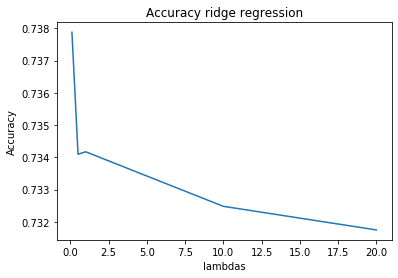

In [18]:
accuracies = list(pd_filled_RR['acc'].values) 
plt.plot(lambdas,accuracies)
plt.ylabel('Accuracy')
plt.xlabel('lambdas')
plt.title('Accuracy ridge regression')
plt.show()

# logistic regression gradient descent: max_iters, gamma, degree, intial_w


In [7]:
lambdas = [0]
gammas = [1e-9,1e-7,1e-6,1e-5]
degrees = [1,2,3,4,5]
max_iterations =  [10,15,30]
factors = [0,0.5,1]
pd_filled_LRGD = hyperparameter_tuning(y,tx,3,2,logistic_regression_gd,max_iterations,degrees,gammas,lambdas,factors)

logistic_regression_gd
GD Logistic Regression: RMSE is  792702.4324450848
TP =  10757 ; FP =  12064 ; TN =  42678 ; FN =  17834
F1 = 0.41846261573173577
Accuracy = 0.6412225648902595
logistic_regression_gd
GD Logistic Regression: RMSE is  571218.545105033
TP =  6579 ; FP =  3945 ; TN =  50804 ; FN =  22005
F1 = 0.33645289966247316
Accuracy = 0.6885987543950176
logistic_regression_gd
GD Logistic Regression: RMSE is  765053.6215651932
TP =  10632 ; FP =  11704 ; TN =  43038 ; FN =  17959
F1 = 0.41753883009012904
Accuracy = 0.6440425761703047
logistic_regression_gd
GD Logistic Regression: RMSE is  845498.2070634237
TP =  10802 ; FP =  12982 ; TN =  41767 ; FN =  17782
F1 = 0.4125420103880232
Accuracy = 0.6308305233220933
logistic_regression_gd
GD Logistic Regression: RMSE is  888714.6523524135
TP =  18487 ; FP =  22800 ; TN =  31942 ; FN =  10104
F1 = 0.5291221843784882
Accuracy = 0.6051504206016824
logistic_regression_gd
GD Logistic Regression: RMSE is  878307.5756256534
TP =  18479 ; FP

In [8]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_LRGD.loc[pd_filled_LRGD['acc'].idxmax()])

,32
acc,0.691227
degree,4
f1,0.293617
factors,1
gamma,1e-09
lambda,0
max_iters,15
out_w,"[0.9998956670000002, 1.1600713998749994, 0.963..."
rmse_te,4.01689e+20
rmse_tr,708865


In [1]:
accuracies = list(pd_filled_LRGD['acc'].values) 
paint=np.zeros((len(max_iterations),len(gammas)))
k = -1
for i in range(len(max_iterations)):
    for j in range(len(gammas)):
        paint[i][j]=accuracies[k]
        k+=1
plt.figure(figsize=(4,4))
sns.heatmap(paint,xticklabels=gammas[::-1], yticklabels=max_iterations[::-1])
plt.xlabel('Gammas')
plt.ylabel('Max iterations')
plt.title('Accuracy logistic regression gradient descent')
plt.show()

NameError: name 'pd_filled_LRGD' is not defined

# regularized logistic regression: max_iters, gamma, lambda_, degrees, intial_w


In [11]:
lambdas = [10000,100000,1000000]
gammas = [1e-9,1e-7,1e-5]
degrees = [4]
max_iterations =  [30,50,100]
factors = [0]
pd_filled_LRRR = hyperparameter_tuning(y,tx,3,2,logistic_regression_reg,max_iterations,degrees,gammas,lambdas,factors)

logistic_regression_reg
Reg Logistic Regression: RMSE is  4.5211977031253944e+20
TP =  4081 ; FP =  1314 ; TN =  53435 ; FN =  24503
F1 = 0.24020718679184205
Accuracy = 0.6901947607790431
logistic_regression_reg
Reg Logistic Regression: RMSE is  5.8484943587346946e+20
TP =  6098 ; FP =  3309 ; TN =  51433 ; FN =  22493
F1 = 0.32096426127690936
Accuracy = 0.690374761499046
logistic_regression_reg
Reg Logistic Regression: RMSE is  4.101875550717425e+20
TP =  6607 ; FP =  4512 ; TN =  50237 ; FN =  21977
F1 = 0.3328211973906254
Accuracy = 0.6821307285229141
logistic_regression_reg
Reg Logistic Regression: RMSE is  4.4711256062160595e+20
TP =  5784 ; FP =  2888 ; TN =  51854 ; FN =  22807
F1 = 0.3104419933982771
Accuracy = 0.6916587666350665
logistic_regression_reg
Reg Logistic Regression: RMSE is  4.7882429874929035e+20
TP =  6259 ; FP =  3761 ; TN =  50988 ; FN =  22325
F1 = 0.32426691534556
Accuracy = 0.6869667478669915
logistic_regression_reg
Reg Logistic Regression: RMSE is  5.3475495

C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\functions.py:219: RuntimeWarning: overflow encountered in double_scalars
  loss = calculate_loss_lr(y, tx, w) + lambda_*np.sum(w.T.dot(w))


Reg Logistic Regression: RMSE is  inf
TP =  28591 ; FP =  54742 ; TN =  0 ; FN =  0
F1 = 0.5109002537436117
Accuracy = 0.34309337237348947


C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\functions.py:131: RuntimeWarning: overflow encountered in square
  mse = 1/(2*N)*np.sum(e**2)


logistic_regression_reg
Reg Logistic Regression: RMSE is  8.100557592036855e+282
TP =  28584 ; FP =  54749 ; TN =  0 ; FN =  0
F1 = 0.5108071159877409
Accuracy = 0.34300937203748816
logistic_regression_reg
Reg Logistic Regression: RMSE is  inf
TP =  28591 ; FP =  54742 ; TN =  0 ; FN =  0
F1 = 0.5109002537436117
Accuracy = 0.34309337237348947
logistic_regression_reg


C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\functions.py:205: RuntimeWarning: overflow encountered in matmul
  pred = sigmoid(np.matmul(tx, w))
C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\functions.py:213: RuntimeWarning: overflow encountered in matmul
  pred = sigmoid(np.matmul(tx, w))
C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\functions.py:205: RuntimeWarning: invalid value encountered in matmul
  pred = sigmoid(np.matmul(tx, w))
C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\functions.py:213: RuntimeWarning: invalid value encountered in matmul
  pred = sigmoid(np.matmul(tx, w))


Reg Logistic Regression: RMSE is  nan
TP =  0 ; FP =  0 ; TN =  0 ; FN =  0
F1 = 0
Accuracy = 0


C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\proj1_helpers.py:30: RuntimeWarning: invalid value encountered in less_equal
  y_pred[np.where(y_pred <= 0)] = -1
C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Machine-learning\proj1_helpers.py:31: RuntimeWarning: invalid value encountered in greater
  y_pred[np.where(y_pred > 0)] = 1


In [12]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_LRRR.loc[pd_filled_LRRR['acc'].idxmax()])

,1
acc,0.690227
degree,4
f1,0.306178
factors,0
gamma,1e-09
lambda,10000
max_iters,50
out_w,"[0.00018442185250001092, 0.2774044294436887, -..."
rmse_te,2.7803e+20
rmse_tr,4.86897e+20


# 4) Feature modification and compare results with previous runs


Only doing the example for the best case, ridge regression accuracy  ~ 0.74. Could have also been least squares, which is similar

In [24]:
# MANIPULATE MISSING VALUES

In [82]:
tx_999 = manipulate_missing_values(tx)

In [83]:
tx_999.shape

(250000, 30)

In [27]:
lambdas = [0.5,1,10,20]
gammas = [0]
degrees = [0, 1, 2, 3]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y,tx_999,3,2,ridge_regression,np.ones(tx_999.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9069896920946815
(83333, 30)
TP =  6456 ; FP =  2687 ; TN =  52055 ; FN =  22135
F1 = 0.34218476705358564
Accuracy = 0.7021348085392342
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9067067047627023
(83333, 30)
TP =  6333 ; FP =  2702 ; TN =  52047 ; FN =  22251
F1 = 0.33669156543236134
Accuracy = 0.700562802251209
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9069896920946815
(83333, 30)
TP =  6456 ; FP =  2687 ; TN =  52055 ; FN =  22135
F1 = 0.34218476705358564
Accuracy = 0.7021348085392342
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9071236049323891
(83333, 30)
TP =  6285 ; FP =  2658 ; TN =  52091 ; FN =  22299
F1 = 0.3349588296426573
Accuracy = 0.7005148020592082
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9073641801772918
(83333, 30)
TP =  6406 ; FP =  2654 ; TN =  52088 ; FN =  22185
F1 = 0.340283126610183
Accuracy = 0.7019308077232309
ridge_regression
(166666, 30)

In [28]:
#find parameters that maximize accuracy
pd.DataFrame(pd_filled_RR.loc[pd_filled_RR['acc'].idxmax()])

,0
acc,0.701611
degree,0
f1,0.340354
gamma,0
lambda,0.5
max_iters,0
out_w,"[0.0022206090674363253, -0.006331557669508957,..."
rmse_te,0.907176
rmse_tr,0.906895


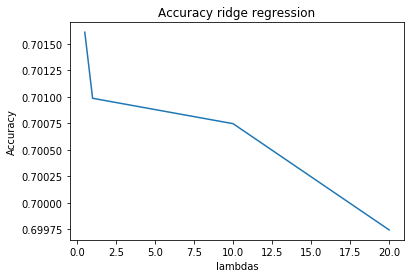

In [29]:
accuracies = list(pd_filled_RR['acc'].values) 
plt.plot(lambdas,accuracies)
plt.ylabel('Accuracy')
plt.xlabel('lambdas')
plt.title('Accuracy ridge regression')
plt.show()

In [30]:
# NORMALIZE FEATURES

In [31]:
tx_stand = standardize_features(tx_999)

In [33]:
lambdas = [0.5,1,10,20]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y,tx_stand,3,2,ridge_regression,np.ones(tx_stand.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9623614292177954
(83333, 30)
TP =  8917 ; FP =  6119 ; TN =  48623 ; FN =  19674
F1 = 0.4087835514704197
Accuracy = 0.6904827619310477
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.961934089758167
(83333, 30)
TP =  8859 ; FP =  6199 ; TN =  48550 ; FN =  19725
F1 = 0.40598506026304926
Accuracy = 0.6889107556430226
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9623614292177954
(83333, 30)
TP =  8917 ; FP =  6119 ; TN =  48623 ; FN =  19674
F1 = 0.4087835514704197
Accuracy = 0.6904827619310477
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.96706125282316
(83333, 30)
TP =  8762 ; FP =  6249 ; TN =  48500 ; FN =  19822
F1 = 0.40197270329166185
Accuracy = 0.6871467485869943
ridge_regression
(166666, 30)
Ridge Regression: RMSE is  0.9674203304022914
(83333, 30)
TP =  8823 ; FP =  6157 ; TN =  48585 ; FN =  19768
F1 = 0.4049941474834179
Accuracy = 0.6888987555950223
ridge_regression
(166666, 30)
R

In [34]:
tx_bal, y_bal = balance_data(tx_stand, y, 0.5)

Before balancing
85667 (34.27)% 1 labels in training data
164333 (65.73)% -1 labels in training data
After balancing
85667 (50.00)% 1 labels in training data
85667 (50.00)% -1 labels in training data


In [35]:
lambdas = [0.5,1,10,20]
gammas = [0]
degrees = [0]
max_iterations =  [0]
pd_filled_RR = hyperparameter_tuning(y_bal,tx_bal,3,2,ridge_regression,np.ones(tx_bal.shape[1]),max_iterations,degrees,gammas,lambdas)

ridge_regression
(114222, 30)
Ridge Regression: RMSE is  0.9605579105519731
(57111, 30)
TP =  9019 ; FP =  3250 ; TN =  25214 ; FN =  19628
F1 = 0.44085443347345776
Accuracy = 0.599411672007144
ridge_regression
(114222, 30)
Ridge Regression: RMSE is  0.9610730493812389
(57111, 30)
TP =  8938 ; FP =  3089 ; TN =  25303 ; FN =  19781
F1 = 0.438717910960585
Accuracy = 0.5995517501006812
ridge_regression
(114222, 30)
Ridge Regression: RMSE is  0.9606373509818962
(57111, 30)
TP =  8894 ; FP =  3133 ; TN =  25483 ; FN =  19601
F1 = 0.4389714229307537
Accuracy = 0.6019330776908126
ridge_regression
(114222, 30)
Ridge Regression: RMSE is  0.9648253401913279
(57111, 30)
TP =  8789 ; FP =  3285 ; TN =  25352 ; FN =  19685
F1 = 0.43351090066094505
Accuracy = 0.5978007739314668
ridge_regression
(114222, 30)
Ridge Regression: RMSE is  0.9649465882521949
(57111, 30)
TP =  8798 ; FP =  3227 ; TN =  25375 ; FN =  19711
F1 = 0.43410470222529235
Accuracy = 0.5983610863056154
ridge_regression
(114222, 30)

In [81]:
#find parameters that maximize accuracy
results = pd.DataFrame(pd_filled_RR.loc[pd_filled_RR['acc'].idxmax()])
print(results)
out_w = results.iloc[[6]]

                                                           0
acc                                                 0.600299
degree                                                     0
f1                                                  0.439515
gamma                                                      0
lambda                                                   0.5
max_iters                                                  0
out_w      [0.008326882430435978, -0.054468085343274346, ...
rmse_te                                             0.960486
rmse_tr                                             0.960756


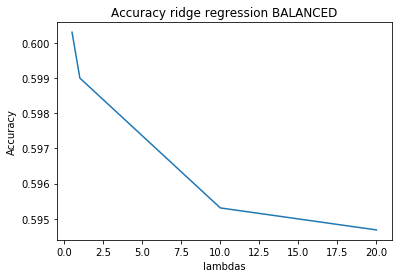

In [69]:
accuracies = list(pd_filled_RR['acc'].values) 
plt.plot(lambdas,accuracies)
plt.ylabel('Accuracy')
plt.xlabel('lambdas')
plt.title('Accuracy ridge regression BALANCED')
plt.show()

In [55]:
DATA_TEST_PATH = r'C:/Users/Arthur Deleu/Documents/Documenten EPFL/Machine Learning/Project/project1/data/test.csv' # TODO: download train data and supply path here 
_, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [58]:
OUTPUT_PATH = r'C:\Users\Arthur Deleu\Documents\Documenten EPFL\Machine Learning\Project\modellen\predictions_rr.csv' # TODO: fill in desired name of output file for submission

y_pred_ls = predict_labels(out_w_ls, build_poly(tx_test, 5))
create_csv_submission(ids_test, y_pred_ls, OUTPUT_PATH)